In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

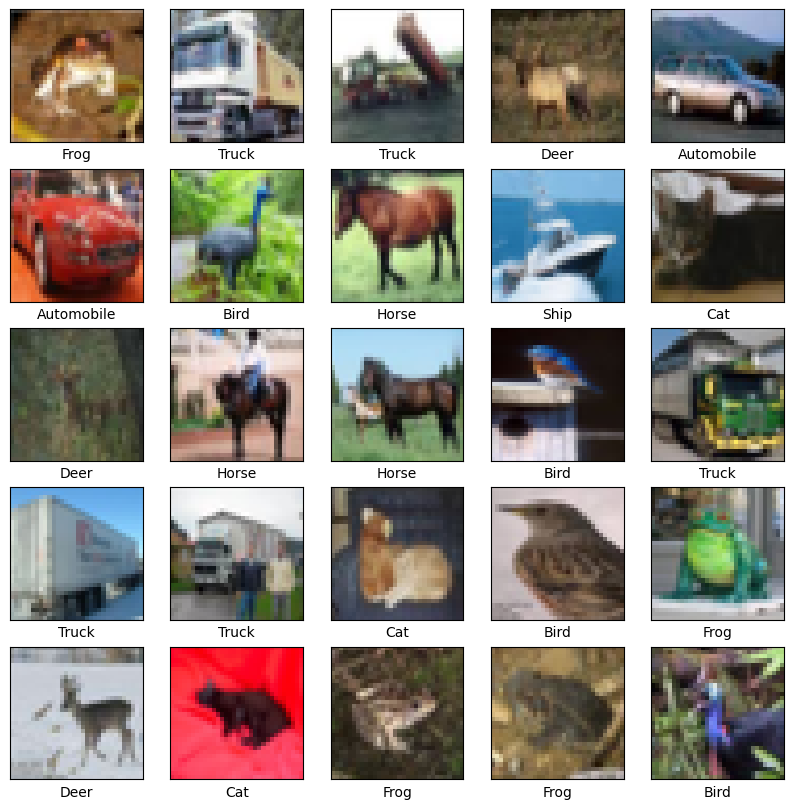

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


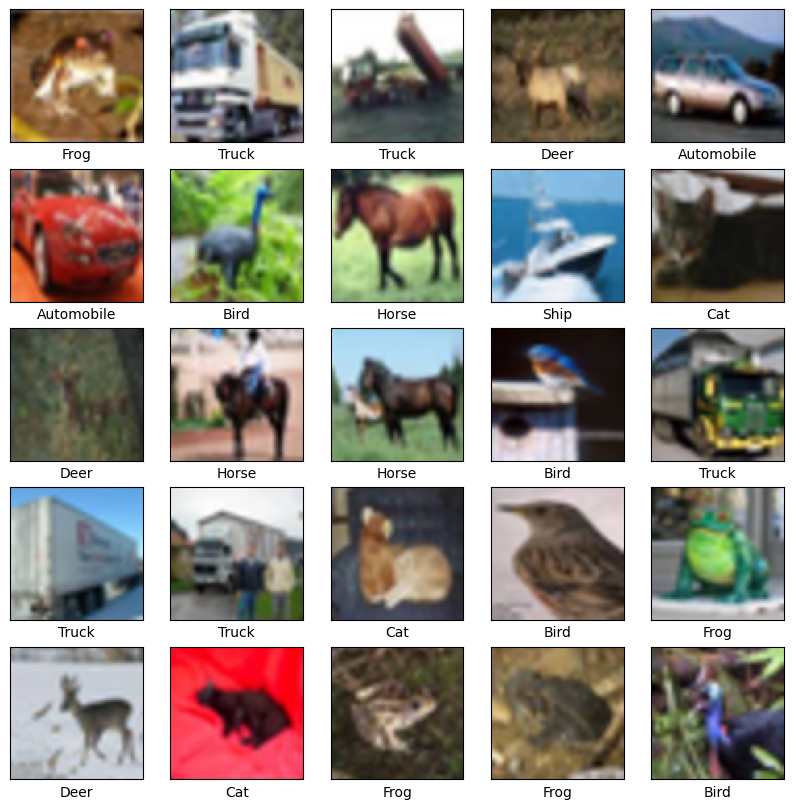

In [ ]:
from PIL import Image

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)

    # Resize image using PIL for better display
    img = Image.fromarray((x_train[i] * 255).astype('uint8')).resize((64, 64))  # from 32x32 to 64x64
    plt.imshow(img)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 44ms/step - accuracy: 0.3444 - loss: 1.7629 - val_accuracy: 0.5583 - val_loss: 1.2562
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.5728 - loss: 1.1977 - val_accuracy: 0.6251 - val_loss: 1.0546
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6448 - loss: 1.0035 - val_accuracy: 0.6367 - val_loss: 1.0365
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6862 - loss: 0.9036 - val_accuracy: 0.6680 - val_loss: 0.9427
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7110 - loss: 0.8261 - val_accuracy: 0.6922 - val_loss: 0.8803
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7320 - loss: 0.7550 - val_accuracy: 0.7028 - val_loss: 0.8622
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7577 - loss: 0.6854 - val_accuracy: 0.7126 - val_loss: 0.8460
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7691 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 4s - 11ms/step - accuracy: 0.7141 - loss: 0.8674

Test accuracy: 0.71


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Actual: Cat
Predicted: Cat


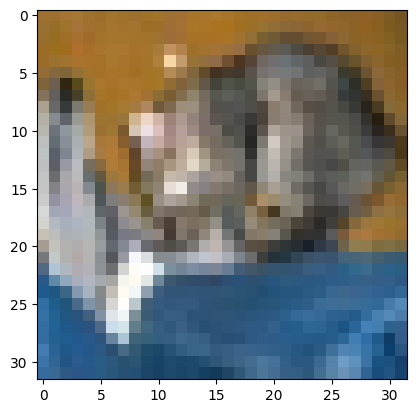

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Show one image and its prediction
i = 0  # change index to test more
plt.imshow(x_test[i])
print(f"Actual: {class_names[y_test[i][0]]}")
print(f"Predicted: {class_names[np.argmax(predictions[i])]}")


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.8063 - loss: 0.5440 - val_accuracy: 0.7111 - val_loss: 0.8784
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.8222 - loss: 0.5043 - val_accuracy: 0.7142 - val_loss: 0.8857
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8394 - loss: 0.4572 - val_accuracy: 0.7153 - val_loss: 0.9145
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.8436 - loss: 0.4458 - val_accuracy: 0.7041 - val_loss: 0.9577
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.8556 - loss: 0.4136 - val_accuracy: 0.7095 - val_loss: 0.9668
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8615 - loss: 0.3897 - val_accuracy: 0.7217 - val_loss: 1.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8709 - loss: 0.3606 - val_accuracy: 0.7103 - val_loss: 1.0493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8816 -

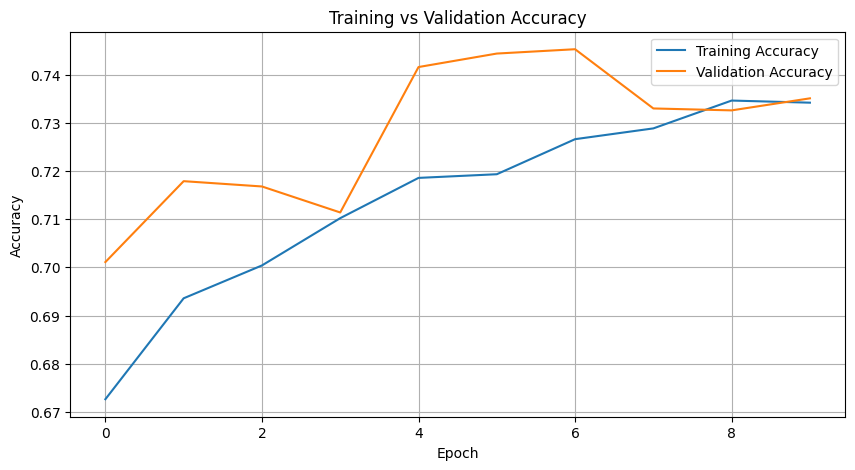

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_loss_plot.png')  # 📂 this saves the plot
plt.show()

# You can also save the loss plot separately if needed


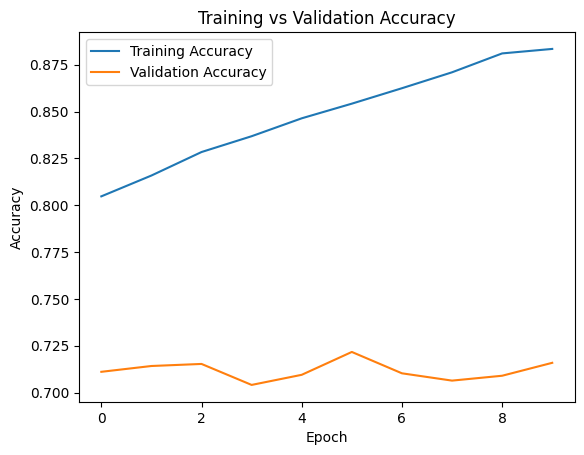

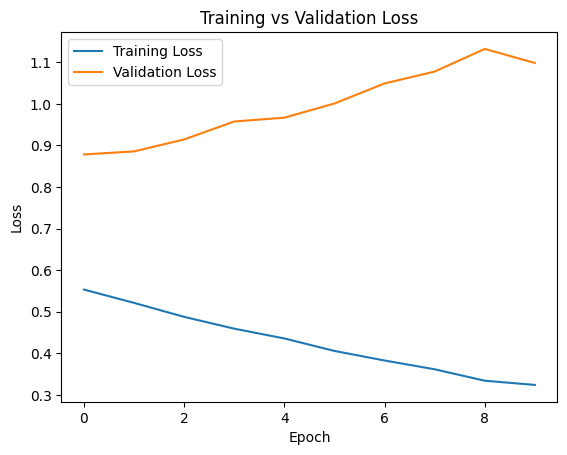

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


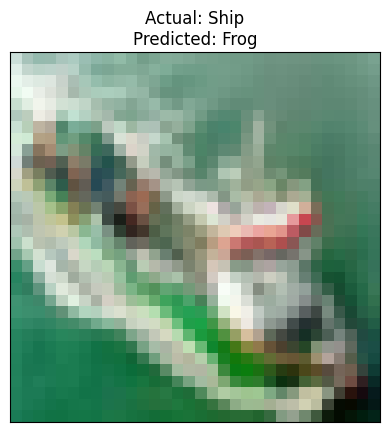

In [ ]:
# Convert model output into probability predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Pick a test image index
i = 15  # change this to try different ones
prediction = probability_model.predict(np.array([x_test[i]]))

plt.imshow(x_test[i])
plt.xticks([]); plt.yticks([])
plt.title(f"Actual: {class_names[y_test[i][0]]}\nPredicted: {class_names[np.argmax(prediction)]}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


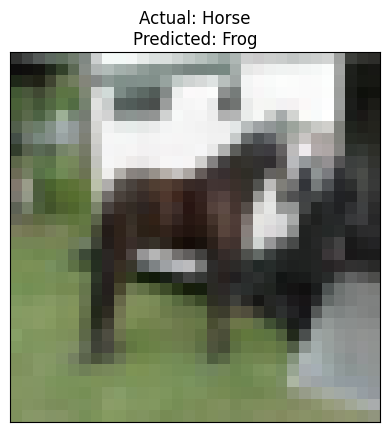

In [ ]:
# Convert model output into probability predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Pick a test image index
i = 20  # change this to try different ones
prediction = probability_model.predict(np.array([x_test[i]]))

plt.imshow(x_test[i])
plt.xticks([]); plt.yticks([])
plt.title(f"Actual: {class_names[y_test[i][0]]}\nPredicted: {class_names[np.argmax(prediction)]}")
plt.show()

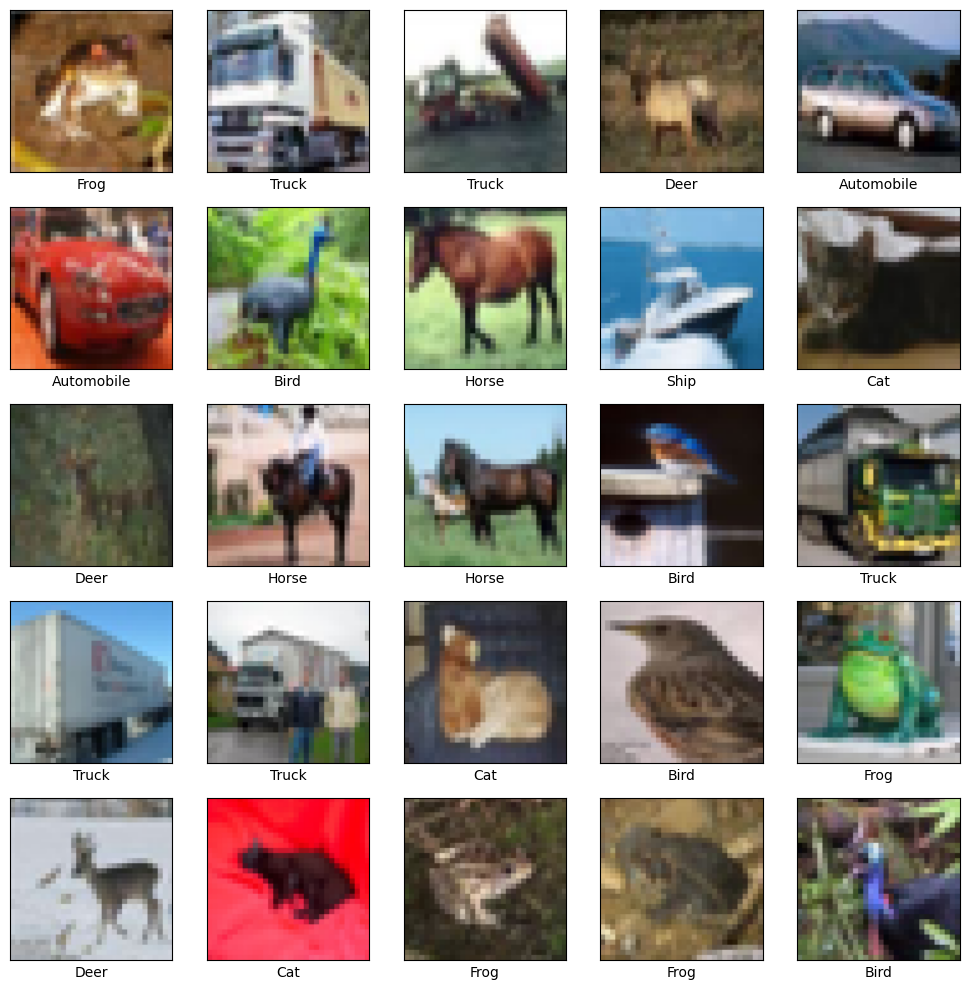

In [ ]:
from PIL import Image

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)

    # Convert to image, scale up, and display
    img = Image.fromarray((x_train[i] * 255).astype('uint8'))
    img = img.resize((96, 96), resample=Image.NEAREST)  # Resize 3x

    plt.imshow(img)
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


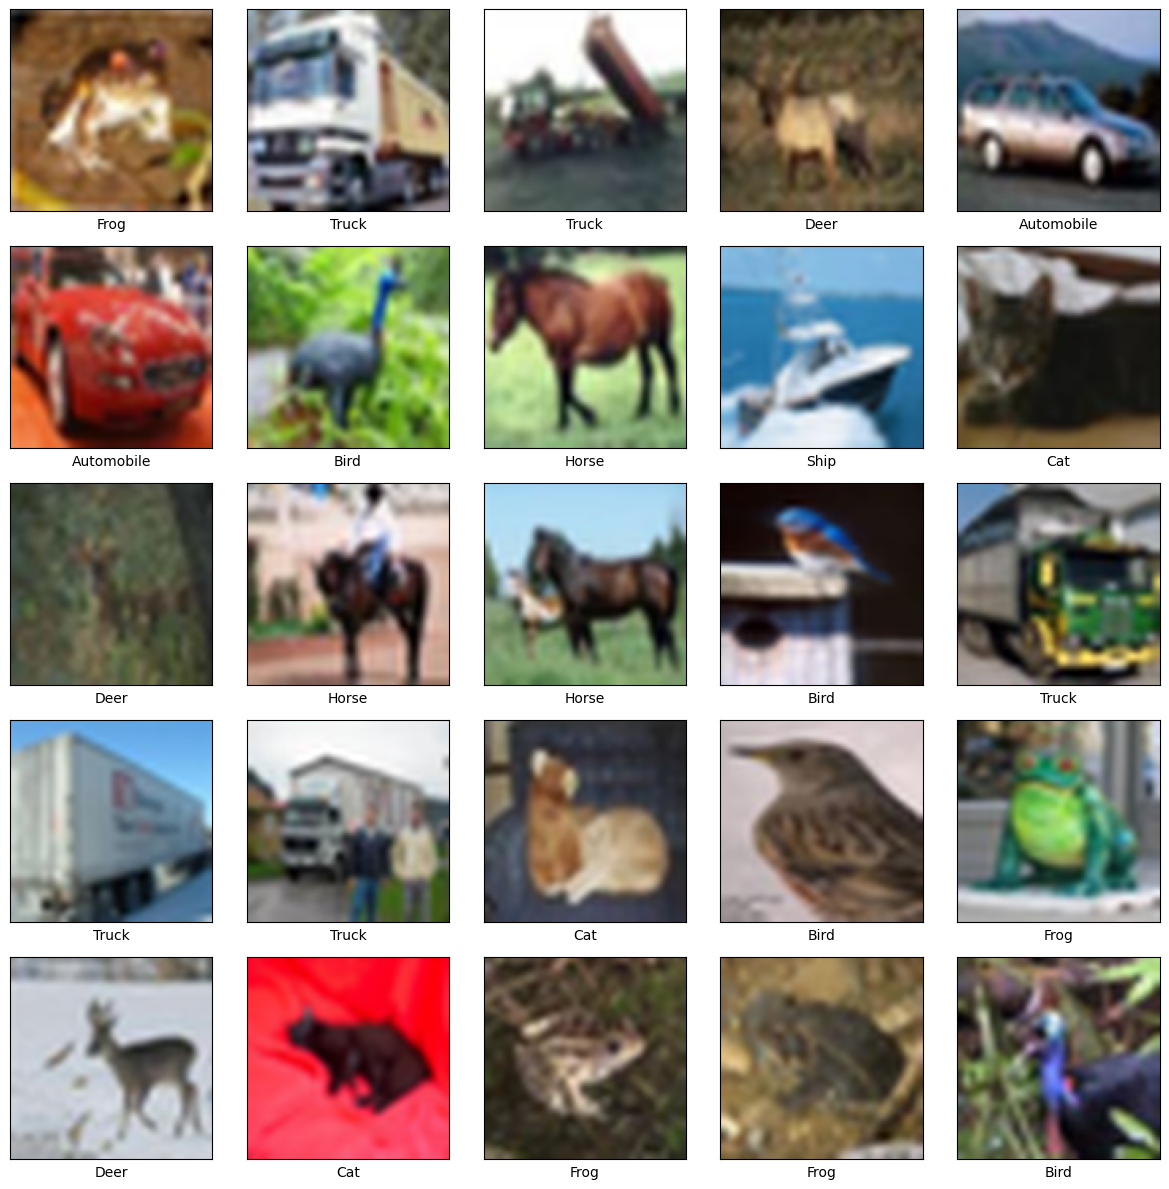

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)

    # Convert normalized float image to uint8
    img_array = (x_train[i] * 255).astype('uint8')

    # Resize with high-quality resampling
    img = Image.fromarray(img_array).resize((128, 128), resample=Image.LANCZOS)

    plt.imshow(img)
    plt.xlabel(class_names[y_train[i][0]], fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
img = Image.fromarray((x_train[0] * 255).astype('uint8')).resize((256, 256), Image.LANCZOS)
img.save("sample_image.png")
img.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.6653 - loss: 1.0130 - val_accuracy: 0.7011 - val_loss: 0.8940
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 111ms/step - accuracy: 0.6922 - loss: 0.8906 - val_accuracy: 0.7179 - val_loss: 0.8313
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.6994 - loss: 0.8549 - val_accuracy: 0.7168 - val_loss: 0.8333
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.7114 - loss: 0.8280 - val_accuracy: 0.7114 - val_loss: 0.8314
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.7185 - loss: 0.8027 - val_accuracy: 0.7416 - val_loss: 0.7653
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.7210 - loss: 0.7982 - val_accuracy: 0.7444 - val_loss: 0.7454
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7259 - loss: 0.7814 - val_accuracy: 0.7453 - val_loss: 0.7591
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.7288 - loss: 0.7745 - va

In [ ]:
# 💾 Save model after training
model.save("image_classifier_vasavi.keras")


In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

    Airplane       0.78      0.76      0.77      1000
  Automobile       0.87      0.84      0.86      1000
        Bird       0.78      0.55      0.64      1000
         Cat       0.56      0.54      0.55      1000
        Deer       0.68      0.72      0.70      1000
         Dog       0.78      0.50      0.61      1000
        Frog       0.77      0.82      0.79      1000
       Horse       0.69      0.87      0.77      1000
        Ship       0.84      0.84      0.84      1000
       Truck       0.67      0.92      0.77      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



In [ ]:
# Save model for future use
model.save("image_classifier_model.h5")


In [ ]:
model.save("my_model.keras")


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_labels, target_names=class_names)

# Save report to a file
with open("classification_report.txt", "w") as f:
    f.write(report)

# Optionally print it to verify
print(report)


              precision    recall  f1-score   support

    Airplane       0.78      0.76      0.77      1000
  Automobile       0.87      0.84      0.86      1000
        Bird       0.78      0.55      0.64      1000
         Cat       0.56      0.54      0.55      1000
        Deer       0.68      0.72      0.70      1000
         Dog       0.78      0.50      0.61      1000
        Frog       0.77      0.82      0.79      1000
       Horse       0.69      0.87      0.77      1000
        Ship       0.84      0.84      0.84      1000
       Truck       0.67      0.92      0.77      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000

